In [54]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn
sns.set()
from sklearn.cluster import KMeans

## examine datasets

In [56]:
articles = pd.read_csv('articles.csv')
customers = pd.read_csv('customers.csv')
transactions = pd.read_csv('transactions_train.csv')

In [4]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [5]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [6]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [57]:
# sum each customers total spending
transactions_sum = transactions.groupby('customer_id', as_index=False).sum('price')[['customer_id', 'price']]
transactions_sum

,customer_id,price
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.648983
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,2.601932
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.704780
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.060983
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0.469695
...,...,...
1362276,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,1.292356
1362277,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,1.807322
1362278,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,0.788932
1362279,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,0.209203


In [58]:
# merge datasets
customer_price = pd.merge(customers, transactions_sum, on="customer_id")

In [9]:
customer_price

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,price
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,0.648983
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,2.601932
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,0.704780
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,0.060983
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,0.469695
...,...,...,...,...,...,...,...,...
1362276,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...,1.292356
1362277,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...,1.807322
1362278,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...,0.788932
1362279,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...,0.209203


In [59]:
# Replace na values
customer_price['FN'] = customer_price['FN'].fillna(0)
customer_price['Active'] = customer_price['Active'].fillna(0)
customer_price['club_member_status'] = customer_price['club_member_status'].fillna('NONE')
customer_price['fashion_news_frequency'] = customer_price['fashion_news_frequency'].fillna('None')
customer_price['fashion_news_frequency'] = customer_price['fashion_news_frequency'].replace(['NONE'],'None')
customer_price = customer_price.dropna(subset=['age'])

In [11]:
customer_price

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,price
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,None,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,0.648983
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,None,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,2.601932
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,ACTIVE,None,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,0.704780
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,ACTIVE,None,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,0.060983
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,0.469695
...,...,...,...,...,...,...,...,...
1362276,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,ACTIVE,None,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...,1.292356
1362277,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,0.0,ACTIVE,None,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...,1.807322
1362278,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...,0.788932
1362279,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...,0.209203


## one hot encoding on categorical columns

In [60]:
customer_price_OHE = pd.get_dummies(customer_price, columns = ['club_member_status', 'fashion_news_frequency'])

In [13]:
customer_price_OHE

,customer_id,FN,Active,age,postal_code,price,club_member_status_ACTIVE,club_member_status_LEFT CLUB,club_member_status_NONE,club_member_status_PRE-CREATE,fashion_news_frequency_Monthly,fashion_news_frequency_None,fashion_news_frequency_Regularly
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,0.648983,1,0,0,0,0,1,0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,2.601932,1,0,0,0,0,1,0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,0.704780,1,0,0,0,0,1,0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,0.060983,1,0,0,0,0,1,0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,0.469695,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362276,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...,1.292356,1,0,0,0,0,1,0
1362277,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,0.0,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...,1.807322,1,0,0,0,0,1,0
1362278,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...,0.788932,1,0,0,0,0,0,1
1362279,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...,0.209203,1,0,0,0,0,0,1


In [61]:
customer_price_OHE.drop(['postal_code'], axis=1, inplace = True)

In [62]:
customer_price_OHE.drop(['customer_id'], axis=1, inplace = True)

In [16]:
customer_price_OHE

,FN,Active,age,price,club_member_status_ACTIVE,club_member_status_LEFT CLUB,club_member_status_NONE,club_member_status_PRE-CREATE,fashion_news_frequency_Monthly,fashion_news_frequency_None,fashion_news_frequency_Regularly
0,0.0,0.0,49.0,0.648983,1,0,0,0,0,1,0
1,0.0,0.0,25.0,2.601932,1,0,0,0,0,1,0
2,0.0,0.0,24.0,0.704780,1,0,0,0,0,1,0
3,0.0,0.0,54.0,0.060983,1,0,0,0,0,1,0
4,1.0,1.0,52.0,0.469695,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1362276,0.0,0.0,24.0,1.292356,1,0,0,0,0,1,0
1362277,0.0,0.0,21.0,1.807322,1,0,0,0,0,1,0
1362278,1.0,1.0,21.0,0.788932,1,0,0,0,0,0,1
1362279,1.0,1.0,18.0,0.209203,1,0,0,0,0,0,1


## standardise age column

In [63]:
print('age mean:')
print(customer_price_OHE['age'].mean())
age_mean = customer_price_OHE['age'].mean()
print('age std')
print(customer_price_OHE['age'].std())
age_std = customer_price_OHE['age'].std()
customer_price_OHE['age'] = (customer_price_OHE['age'] - age_mean) / age_std


age mean:
36.39599189020586
age std
14.30666950415587


In [18]:
customer_price_OHE

,FN,Active,age,price,club_member_status_ACTIVE,club_member_status_LEFT CLUB,club_member_status_NONE,club_member_status_PRE-CREATE,fashion_news_frequency_Monthly,fashion_news_frequency_None,fashion_news_frequency_Regularly
0,0.0,0.0,0.880988,0.648983,1,0,0,0,0,1,0
1,0.0,0.0,-0.796551,2.601932,1,0,0,0,0,1,0
2,0.0,0.0,-0.866448,0.704780,1,0,0,0,0,1,0
3,0.0,0.0,1.230476,0.060983,1,0,0,0,0,1,0
4,1.0,1.0,1.090681,0.469695,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1362276,0.0,0.0,-0.866448,1.292356,1,0,0,0,0,1,0
1362277,0.0,0.0,-1.076141,1.807322,1,0,0,0,0,1,0
1362278,1.0,1.0,-1.076141,0.788932,1,0,0,0,0,0,1
1362279,1.0,1.0,-1.285833,0.209203,1,0,0,0,0,0,1


## k means with PCA (variance reduction)

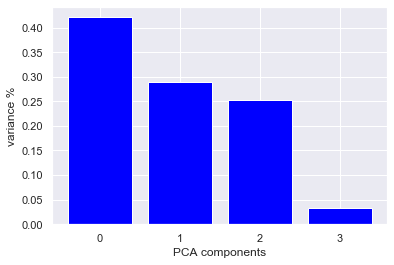

In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(customer_price_OHE)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='blue')
plt.xlabel('PCA components')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

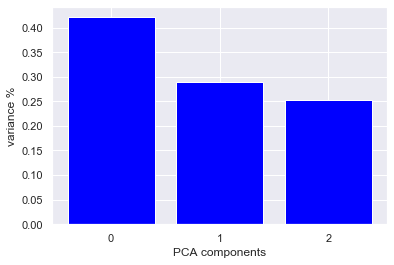

In [65]:
# we use 3 components. 
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(customer_price_OHE)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='blue')
plt.xlabel('PCA components')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

In [66]:
pca = PCA(n_components = 3)
pca.fit(customer_price_OHE)
pca.components_

array([[ 8.67354161e-02,  8.73139447e-02,  2.30405167e-02,
         9.83865420e-01,  2.51787341e-02, -5.61701070e-05,
        -7.33500375e-04, -2.43890636e-02, -8.62311861e-05,
        -8.68529885e-02,  8.69392197e-02],
       [ 1.12994084e-01,  1.12500585e-01,  9.72028117e-01,
        -6.19118094e-02, -1.45801014e-02, -1.00559604e-04,
         1.12211406e-04,  1.45684496e-02,  2.60000048e-04,
        -1.13000015e-01,  1.12740015e-01],
       [-4.80269498e-01, -4.71590327e-01,  2.31175085e-01,
         1.65976801e-01, -4.71911206e-02,  2.46265571e-04,
         1.69794470e-03,  4.52469103e-02, -5.23213814e-04,
         4.80717597e-01, -4.80194383e-01]])

> Correlation

In [67]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = customer_price_OHE.columns,
                           index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,FN,Active,age,price,club_member_status_ACTIVE,club_member_status_LEFT CLUB,club_member_status_NONE,club_member_status_PRE-CREATE,fashion_news_frequency_Monthly,fashion_news_frequency_None,fashion_news_frequency_Regularly
Component 1,0.086735,0.087314,0.023041,0.983865,0.025179,-0.000056,-0.000734,-0.024389,-0.000086,-0.086853,0.086939
Component 2,0.112994,0.112501,0.972028,-0.061912,-0.014580,-0.000101,0.000112,0.014568,0.000260,-0.113000,0.112740
Component 3,-0.480269,-0.471590,0.231175,0.165977,-0.047191,0.000246,0.001698,0.045247,-0.000523,0.480718,-0.480194


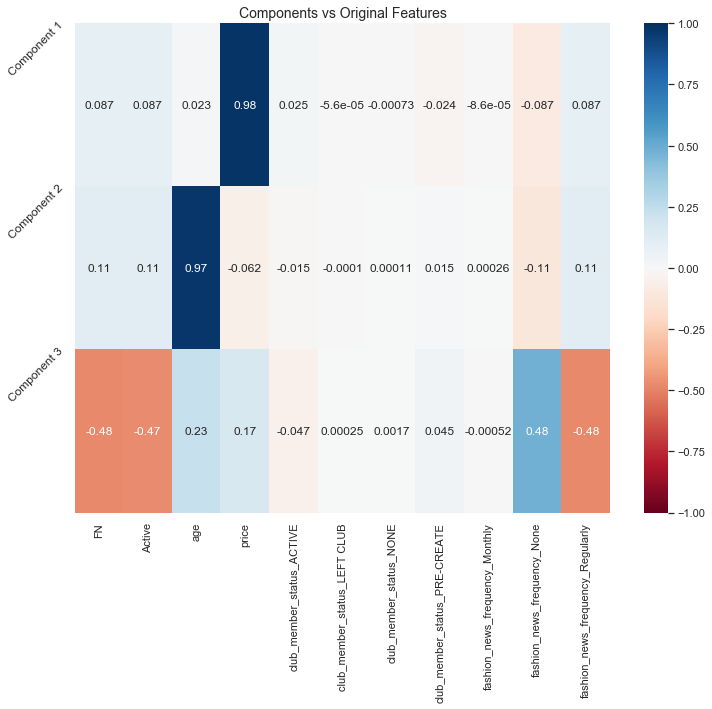

In [68]:
plt.figure(figsize=(12,9))
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2], 
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 12)
plt.title('Components vs Original Features',fontsize = 14)
plt.show()
# blue means component shows positive correlation to that attribute.
# red means component shows negative correlation to that attribute.

In [69]:
pca.transform(customer_price_OHE)
scores_pca = pca.transform(customer_price_OHE)

In [70]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

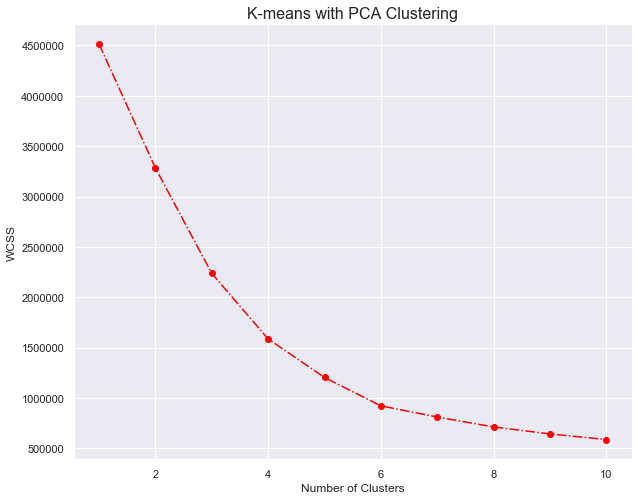

In [25]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering',fontsize = 16)
plt.show()

In [26]:
# elbow method: use 4 clusters
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

In [27]:
customer_price_OHE['age'] = customer_price_OHE['age']* age_std + age_mean

In [28]:
df_segm_pca_kmeans = pd.concat([customer_price_OHE.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']

df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_segm_pca_kmeans.head()


,FN,Active,age,price,club_member_status_ACTIVE,club_member_status_LEFT CLUB,club_member_status_NONE,club_member_status_PRE-CREATE,fashion_news_frequency_Monthly,fashion_news_frequency_None,fashion_news_frequency_Regularly,Component 1,Component 2,Component 3,Segment K-means PCA
0,0.0,0.0,49.0,0.648983,1,0,0,0,0,1,0,-0.102859,0.697432,0.863813,3
1,0.0,0.0,25.0,2.601932,1,0,0,0,0,1,0,1.779928,-1.054094,0.800152,1
2,0.0,0.0,24.0,0.704780,1,0,0,0,0,1,0,-0.088225,-1.004580,0.469110,1
3,0.0,0.0,54.0,0.060983,1,0,0,0,0,1,0,-0.673320,1.073548,0.847012,3
4,1.0,1.0,52.0,0.469695,1,0,0,0,0,0,1,0.073418,1.363594,-1.030241,0


In [29]:
# this table shows the attributes + assigned clusters
df_segm_pca_kmeans 

,FN,Active,age,price,club_member_status_ACTIVE,club_member_status_LEFT CLUB,club_member_status_NONE,club_member_status_PRE-CREATE,fashion_news_frequency_Monthly,fashion_news_frequency_None,fashion_news_frequency_Regularly,Component 1,Component 2,Component 3,Segment K-means PCA
0,0.0,0.0,49.0,0.648983,1,0,0,0,0,1,0,-0.102859,0.697432,0.863813,3
1,0.0,0.0,25.0,2.601932,1,0,0,0,0,1,0,1.779928,-1.054094,0.800152,1
2,0.0,0.0,24.0,0.704780,1,0,0,0,0,1,0,-0.088225,-1.004580,0.469110,1
3,0.0,0.0,54.0,0.060983,1,0,0,0,0,1,0,-0.673320,1.073548,0.847012,3
4,1.0,1.0,52.0,0.469695,1,0,0,0,0,0,1,0.073418,1.363594,-1.030241,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346515,0.0,0.0,24.0,1.292356,1,0,0,0,0,1,0,0.489871,-1.040958,0.566634,1
1346516,0.0,0.0,21.0,1.807322,1,0,0,0,0,1,0,0.991697,-1.276667,0.603631,1
1346517,1.0,1.0,21.0,0.788932,1,0,0,0,0,0,1,0.337580,-0.762382,-1.478170,0
1346518,1.0,1.0,18.0,0.209203,1,0,0,0,0,0,1,-0.237627,-0.930317,-1.622867,0


In [30]:
# We calculate the means by segments.
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,FN,Active,age,price,club_member_status_ACTIVE,club_member_status_LEFT CLUB,club_member_status_NONE,club_member_status_PRE-CREATE,fashion_news_frequency_Monthly,fashion_news_frequency_None,fashion_news_frequency_Regularly,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,,,,,
0,0.998895,0.974457,35.601008,0.547257,0.987729,0.000016,0.000659,0.011596,0.001521,0.000182,0.998297,0.120236,0.241744,-1.267765
1,0.000907,0.000515,26.635884,0.436648,0.923161,0.000572,0.003485,0.072781,0.000048,0.998024,0.001928,-0.351035,-0.806109,0.471570
2,0.458794,0.454430,36.838339,5.035834,0.994360,0.000323,0.001563,0.003754,0.000018,0.539858,0.460124,4.352830,-0.193485,0.519056
3,0.057297,0.052656,53.530739,0.404330,0.868860,0.000400,0.004694,0.126046,0.000496,0.941819,0.057685,-0.323012,1.049633,0.800297


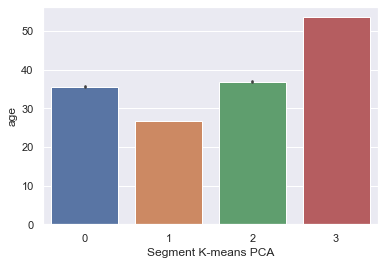

In [50]:
sns.barplot(x='Segment K-means PCA',y='age',data=df_segm_pca_kmeans)

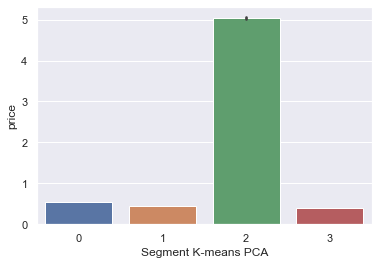

In [48]:
sns.barplot(x='Segment K-means PCA',y='price',data=df_segm_pca_kmeans)

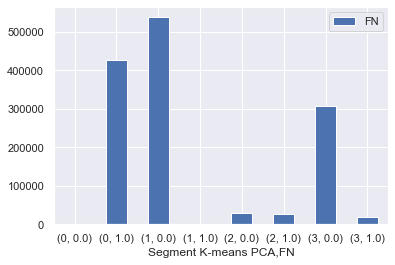

In [38]:
df2 = pd.DataFrame(df_segm_pca_kmeans.groupby(['Segment K-means PCA','FN'])['FN'].count())
ax = df2.plot.bar(rot=0)

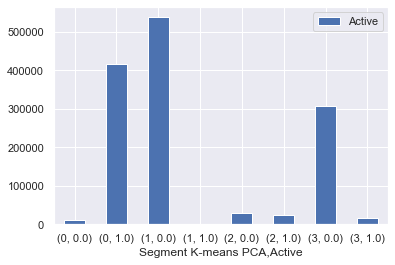

In [39]:
df2 = pd.DataFrame(df_segm_pca_kmeans.groupby(['Segment K-means PCA','Active'])['Active'].count())
ax = df2.plot.bar(rot=0)

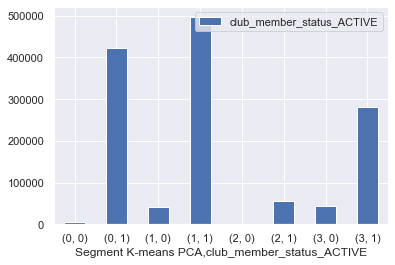

In [40]:
df2 = pd.DataFrame(df_segm_pca_kmeans.groupby(['Segment K-means PCA','club_member_status_ACTIVE'])['club_member_status_ACTIVE'].count())
ax = df2.plot.bar(rot=0)

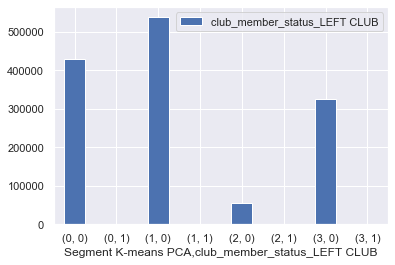

In [41]:
df2 = pd.DataFrame(df_segm_pca_kmeans.groupby(['Segment K-means PCA','club_member_status_LEFT CLUB'])['club_member_status_LEFT CLUB'].count())
ax = df2.plot.bar(rot=0)

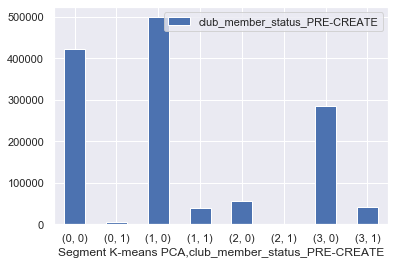

In [42]:
df2 = pd.DataFrame(df_segm_pca_kmeans.groupby(['Segment K-means PCA','club_member_status_PRE-CREATE'])['club_member_status_PRE-CREATE'].count())
ax = df2.plot.bar(rot=0)

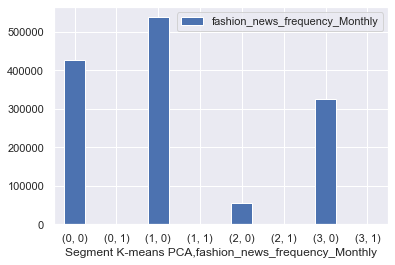

In [43]:
df2 = pd.DataFrame(df_segm_pca_kmeans.groupby(['Segment K-means PCA','fashion_news_frequency_Monthly'])['fashion_news_frequency_Monthly'].count())
ax = df2.plot.bar(rot=0)

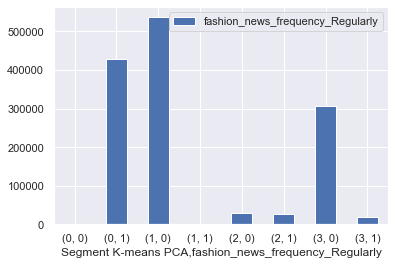

In [44]:
df2 = pd.DataFrame(df_segm_pca_kmeans.groupby(['Segment K-means PCA','fashion_news_frequency_Regularly'])['fashion_news_frequency_Regularly'].count())
ax = df2.plot.bar(rot=0)

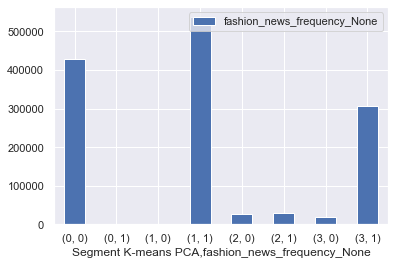

In [46]:
df2 = pd.DataFrame(df_segm_pca_kmeans.groupby(['Segment K-means PCA','fashion_news_frequency_None'])['fashion_news_frequency_None'].count())
ax = df2.plot.bar(rot=0)

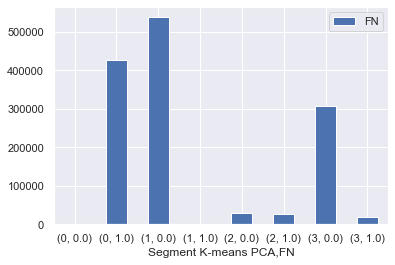

In [47]:
df2 = pd.DataFrame(df_segm_pca_kmeans.groupby(['Segment K-means PCA','FN'])['FN'].count())
ax = df2.plot.bar(rot=0)